In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter
from matplotlib.patches import Arc

In [73]:
file = ET.parse(r"pass_matrix_23_2017_g942842_t188.xml") ##use the path to your file

In [74]:
namelist= []
xlist =[]
ylist = []
pointslist = []
passer = []
receiver = []
passeslist = []
links = []
poslist = []
pass_success_list = []

for node in file.getroot():
    name = node.attrib.get("player_name")
    x = node.attrib.get("x")
    y = node.attrib.get("y")
    pos = node.attrib.get("position")
    pass_success = node.attrib.get("pass_success")
    namelist.append(name)
    xlist.append(x)
    ylist.append(y)
    poslist.append(pos)
    pass_success_list.append(pass_success)

    for players in node:
            passes = players.text
            name = players.attrib.get("player_name")
            passer.append(node.attrib.get("player_name"))
            receiver.append(name)
            passeslist.append(passes)
                   
 




In [75]:
xlist = [float(i) for i in xlist]
xlist = [i*1.3 for i in xlist]

In [76]:
ylist = [float(i) for i in ylist]
ylist = [i*0.9 for i in ylist]

In [77]:
for i,j in zip(xlist,ylist):
    point = [i,j]
    pointslist.append(point)
    

In [78]:
pass_success_list = [int(i) for i in pass_success_list]

In [80]:
player_dict = dict(zip(namelist, pointslist))

In [81]:
player_dict

{'Sergio Canales': [70.434, 52.757999999999996],
 'Jon Bautista': [95.12100000000001, 38.592000000000006],
 'Carlos Vela': [87.061, 31.743000000000002],
 'Asier Illarramendi': [65.065, 57.024],
 'Xabi Prieto': [85.137, 23.751],
 'Andoni Gorosabel': [65.117, 12.645000000000001],
 'Aritz Elustondo': [51.584, 28.206],
 'Diego Llorente': [53.248000000000005, 57.042],
 'Juanmi': [71.331, 61.209],
 'Alberto de la Bella': [62.868, 77.706],
 'Willian José': [64.168, 48.42],
 'Álvaro Odriozola': [78.44200000000001, 11.763],
 'Igor Zubeldia': [60.489000000000004, 35.964],
 'Gerónimo Rulli': [11.947, 47.358]}

In [85]:
P_Df = pd.DataFrame(data = list(zip(namelist,xlist,ylist,poslist,pass_success_list)), 
                    columns = ["Name","x","y","Position","PassSuccess"])

In [86]:
P_Df

,Name,x,y,Position,PassSuccess
0,Sergio Canales,70.434,52.758,Substitute,14
1,Jon Bautista,95.121,38.592,Substitute,7
2,Carlos Vela,87.061,31.743,Midfielder,31
3,Asier Illarramendi,65.065,57.024,Midfielder,79
4,Xabi Prieto,85.137,23.751,Midfielder,33
5,Andoni Gorosabel,65.117,12.645,Defender,23
6,Aritz Elustondo,51.584,28.206,Defender,56
7,Diego Llorente,53.248,57.042,Defender,71
8,Juanmi,71.331,61.209,Midfielder,14
9,Alberto de la Bella,62.868,77.706,Defender,55


In [30]:
# corregido list(zip())
P_Df = pd.DataFrame(data = list(zip(namelist,xlist,ylist,poslist)), columns = ["Name","x","y","Position"])

In [31]:
P_Df

,Name,x,y,Position
0,Sergio Canales,70.434,52.758,Substitute
1,Jon Bautista,95.121,38.592,Substitute
2,Carlos Vela,87.061,31.743,Midfielder
3,Asier Illarramendi,65.065,57.024,Midfielder
4,Xabi Prieto,85.137,23.751,Midfielder
5,Andoni Gorosabel,65.117,12.645,Defender
6,Aritz Elustondo,51.584,28.206,Defender
7,Diego Llorente,53.248,57.042,Defender
8,Juanmi,71.331,61.209,Midfielder
9,Alberto de la Bella,62.868,77.706,Defender


In [32]:
for x,y,z in zip(passer, receiver, passeslist):
    link = [x,y,z]
    links.append(link)
    
df = pd.DataFrame.from_records(data = links, columns = ["Passer","Receiver","Number of Passes"])

In [33]:
df

,Passer,Receiver,Number of Passes
0,Sergio Canales,Carlos Vela,1
1,Sergio Canales,Jon Bautista,1
2,Sergio Canales,Asier Illarramendi,4
3,Sergio Canales,Xabi Prieto,4
4,Sergio Canales,Alberto de la Bella,2
5,Sergio Canales,Juanmi,1
6,Sergio Canales,Igor Zubeldia,1
7,Jon Bautista,Carlos Vela,1
8,Jon Bautista,Asier Illarramendi,2
9,Jon Bautista,Xabi Prieto,2


In [34]:
df["Number of Passes"] = pd.to_numeric(df["Number of Passes"])
dff = df.groupby("Passer").sum()[['Number of Passes']].reset_index()

In [35]:
dff

,Passer,Number of Passes
0,Alberto de la Bella,55
1,Andoni Gorosabel,23
2,Aritz Elustondo,56
3,Asier Illarramendi,79
4,Carlos Vela,31
5,Diego Llorente,71
6,Gerónimo Rulli,22
7,Igor Zubeldia,47
8,Jon Bautista,7
9,Juanmi,14


In [55]:
df.sort_values(by=['Number of Passes'],ascending=False).head(20)

,Passer,Receiver,Number of Passes
63,Diego Llorente,Asier Illarramendi,28
59,Aritz Elustondo,Diego Llorente,25
31,Asier Illarramendi,Alberto de la Bella,19
77,Alberto de la Bella,Asier Illarramendi,15
30,Asier Illarramendi,Diego Llorente,13
67,Diego Llorente,Alberto de la Bella,13
83,Alberto de la Bella,Diego Llorente,12
66,Diego Llorente,Aritz Elustondo,12
23,Asier Illarramendi,Aritz Elustondo,10
100,Igor Zubeldia,Aritz Elustondo,10


In [57]:
df= df[df['Number of Passes'] > 4]

In [58]:
df.sort_values(by=['Number of Passes'],ascending=False).head(20)

,Passer,Receiver,Number of Passes
63,Diego Llorente,Asier Illarramendi,28
59,Aritz Elustondo,Diego Llorente,25
31,Asier Illarramendi,Alberto de la Bella,19
77,Alberto de la Bella,Asier Illarramendi,15
30,Asier Illarramendi,Diego Llorente,13
67,Diego Llorente,Alberto de la Bella,13
83,Alberto de la Bella,Diego Llorente,12
66,Diego Llorente,Aritz Elustondo,12
55,Aritz Elustondo,Igor Zubeldia,10
23,Asier Illarramendi,Aritz Elustondo,10


In [101]:
P_Df.head()

,Name,x,y,Position,PassSuccess
0,Sergio Canales,70.434,52.758,Substitute,14
1,Jon Bautista,95.121,38.592,Substitute,7
2,Carlos Vela,87.061,31.743,Midfielder,31
3,Asier Illarramendi,65.065,57.024,Midfielder,79
4,Xabi Prieto,85.137,23.751,Midfielder,33


In [102]:
df.head()

,Passer,Receiver,Number of Passes
16,Carlos Vela,Xabi Prieto,9
22,Asier Illarramendi,Carlos Vela,8
23,Asier Illarramendi,Aritz Elustondo,10
24,Asier Illarramendi,Willian José,6
25,Asier Illarramendi,Igor Zubeldia,5


In [36]:
def Plotter(passer, receiver, number):
    xcord = []
    ycord = []
    passer_loc = [val for key, val in player_dict.items() if key ==passer]
    receiver_loc = [val for key, val in player_dict.items() if key == receiver]
    for i,j in zip(passer_loc, receiver_loc):
        xcord.append(i[0])
        ycord.append(i[1])
        xcord.append(j[0])
        ycord.append(j[1])
        plt.arrow(x = xcord[0], y = ycord[0],dx = (xcord[1]-xcord[0]), dy = (ycord[1]-ycord[0]), linewidth = int(number), alpha = (int(number)/10), color = "red")
        

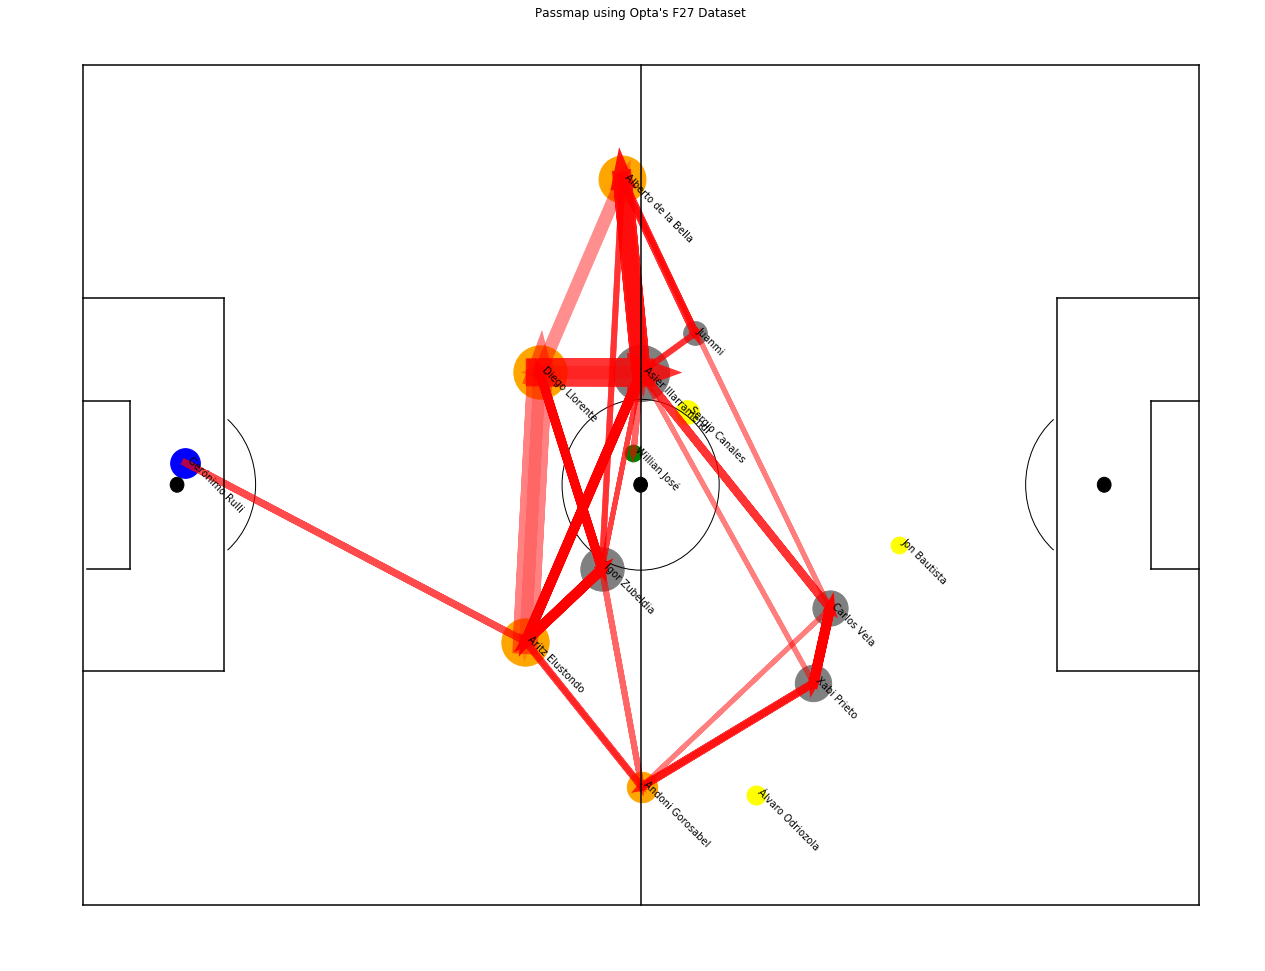

In [98]:
fig, ax = plt.subplots(figsize=(22, 17))
  
for i in range(len(df)):
    Plotter(df.iloc[i,0], df.iloc[i,1], df.iloc[i,2])


for i in range(len(P_Df)):
    ax.text(P_Df.iloc[i,1], P_Df.iloc[i,2], s = P_Df.iloc[i,0], rotation = -45, size = 10)
    if P_Df.iloc[i,3] == "Goalkeeper":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "blue")
    if P_Df.iloc[i,3] == "Forward":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "green")            
    if P_Df.iloc[i,3] == "Midfielder":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "grey")
    if P_Df.iloc[i,3] == "Defender":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "orange")
    if P_Df.iloc[i,3] == "Substitute":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "yellow")
  
###########################

plt.plot([0,0],[0,90], color="black")
plt.plot([0,130],[90,90], color="black")
plt.plot([130,130],[90,0], color="black")
plt.plot([130,0],[0,0], color="black")
plt.plot([65,65],[0,90], color="black")
    
#Left Penalty Area
plt.plot([16.5,16.5],[65,25],color="black")
plt.plot([0,16.5],[65,65],color="black")
plt.plot([16.5,0],[25,25],color="black")
    
    #Right Penalty Area
plt.plot([130,113.5],[65,65],color="black")
plt.plot([113.5,113.5],[65,25],color="black")
plt.plot([113.5,130],[25,25],color="black")
    
    #Left 6-yard Box
plt.plot([0,5.5],[54,54],color="black")
plt.plot([5.5,5.5],[54,36],color="black")
plt.plot([5.5,0.5],[36,36],color="black")
    
    #Right 6-yard Box
plt.plot([130,124.5],[54,54],color="black")
plt.plot([124.5,124.5],[54,36],color="black")
plt.plot([124.5,130],[36,36],color="black")
    
    #Prepare Circles
centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
centreSpot = plt.Circle((65,45),0.8,color="black")
leftPenSpot = plt.Circle((11,45),0.8,color="black")
rightPenSpot = plt.Circle((119,45),0.8,color="black")
    
    #Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)
    
    #Prepare Arcs
leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)
plt.axis("off")
plt.title("Passmap using Opta's F27 Dataset")

plt.show()

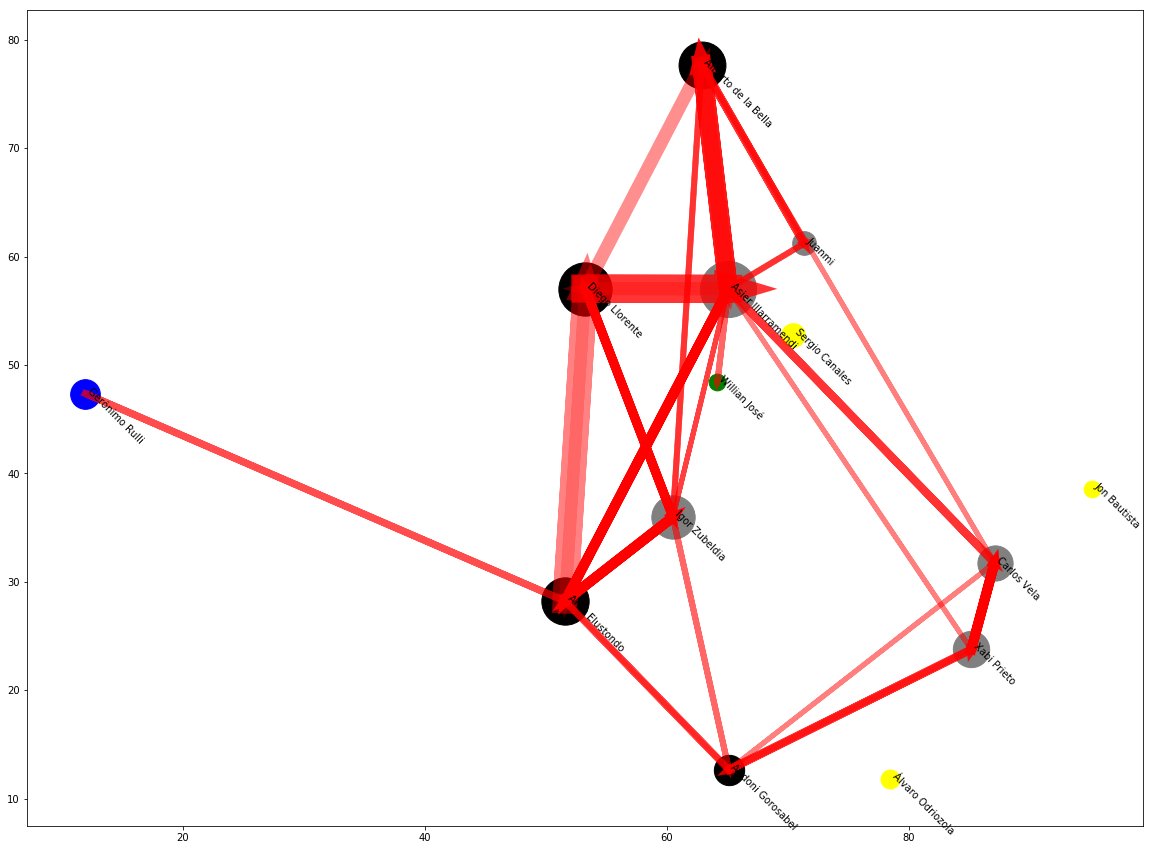

In [93]:
fig, ax = plt.subplots(figsize=(20, 15))
    
for i in range(len(df)):
    Plotter(df.iloc[i,0], df.iloc[i,1], df.iloc[i,2])


for i in range(len(P_Df)):
    ax.text(P_Df.iloc[i,1], P_Df.iloc[i,2], s = P_Df.iloc[i,0], rotation = -45, size = 10)
    if P_Df.iloc[i,3] == "Goalkeeper":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "blue")
    if P_Df.iloc[i,3] == "Forward":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "green")            
    if P_Df.iloc[i,3] == "Midfielder":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "grey")
    if P_Df.iloc[i,3] == "Defender":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "black")
    if P_Df.iloc[i,3] == "Substitute":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "yellow")

plt.show()

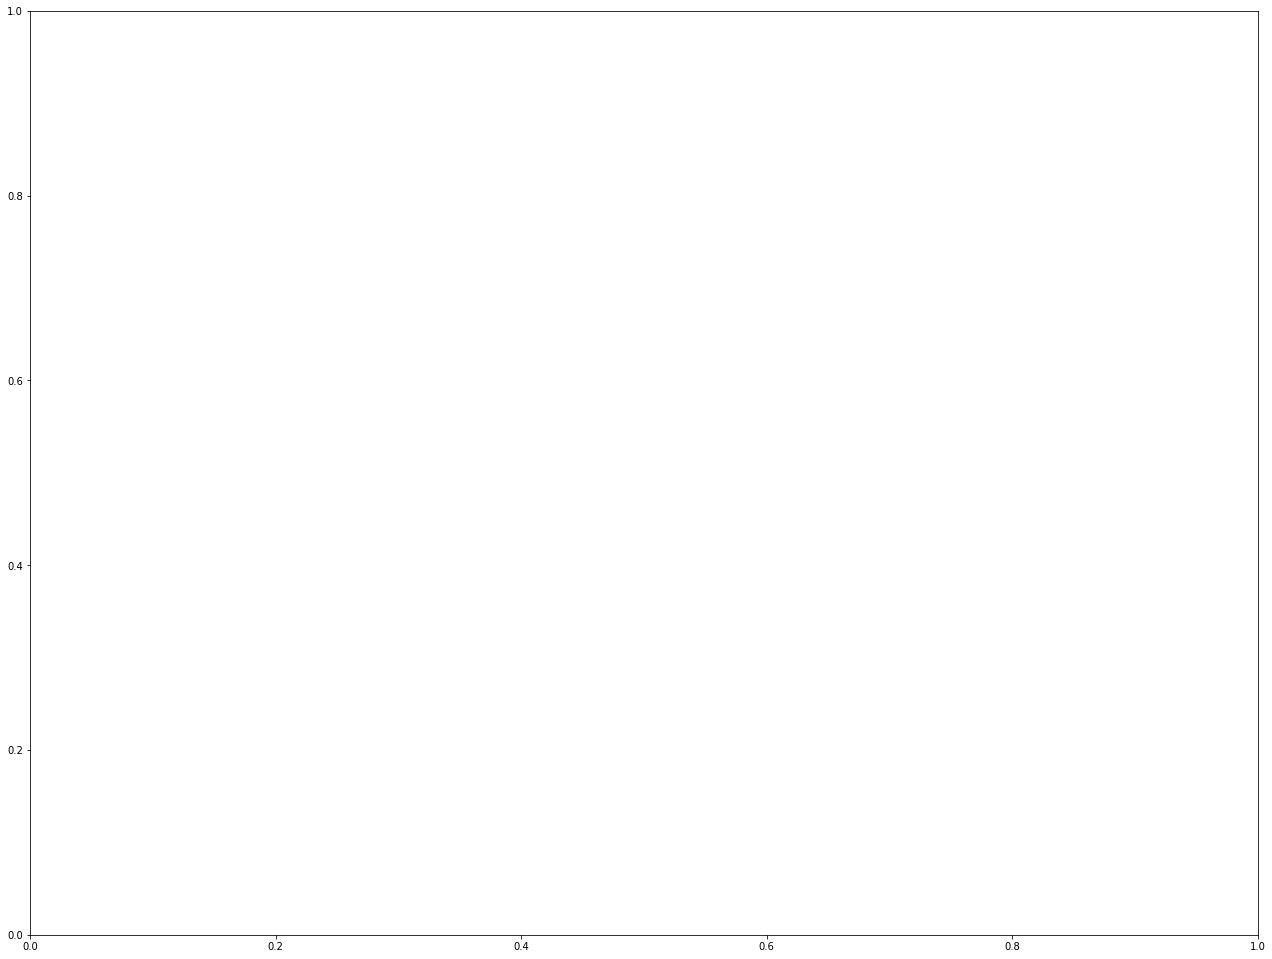

In [103]:
# Why Empty
fig, ax = plt.subplots(figsize=(22, 17))
  
for i in range(len(df)):
    Plotter(df.iloc[i,0], df.iloc[i,1], df.iloc[i,2])

plt.show()

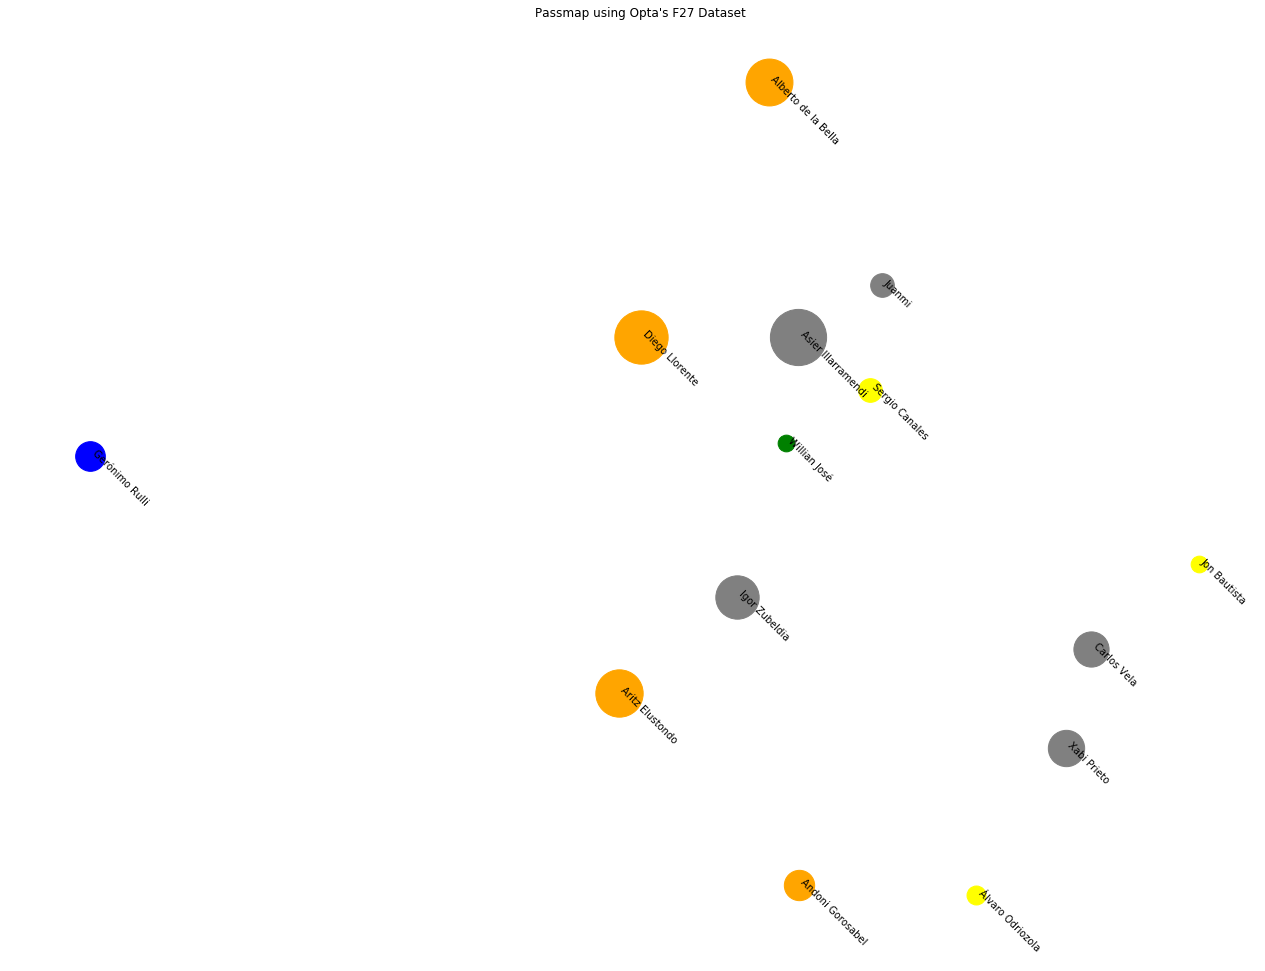

In [105]:
fig, ax = plt.subplots(figsize=(22, 17))
  
for i in range(len(P_Df)):
    ax.text(P_Df.iloc[i,1], P_Df.iloc[i,2], s = P_Df.iloc[i,0], rotation = -45, size = 10)
    if P_Df.iloc[i,3] == "Goalkeeper":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "blue")
    if P_Df.iloc[i,3] == "Forward":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "green")            
    if P_Df.iloc[i,3] == "Midfielder":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "grey")
    if P_Df.iloc[i,3] == "Defender":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "orange")
    if P_Df.iloc[i,3] == "Substitute":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "yellow")

plt.title("Passmap using Opta's F27 Dataset")
plt.axis("off")
plt.show()